a calculer
- duration from tags and from tool
- energy conso (kWh)
- carbon
- variance entre exp pour une meme benchmark

In [1]:
import sys
sys.path.append("/Users/mathildepro/Documents/code_projects/GPU_benchmarks/code/")
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from utils.process_results import add_benchmark_id_to_merged_timeseries, cleaning_table
import pandas as pd

repo_dir = "/Users/mathildepro/Documents/code_projects/GPU_benchmarks/" #
#repo_dir = "/home/mjay/GPU_benchmark_energy/" 
prefix = [repo_dir + "results/night_exp_20_04/", repo_dir + "results/night_exp_19_04/"]

energy_scope_df = pd.concat([pd.read_csv(file + 'es_ts.csv') for file in prefix])
watt_df = pd.concat([pd.read_csv(file + 'g5k_metrics.csv') for file in prefix])
exp_table = pd.concat([pd.read_csv(file + 'processed_table.csv') for file in prefix])

exp_table = cleaning_table(exp_table, watt_df, energy_scope_df)

grouped_watt_df = watt_df.groupby(by=['timestamp_sec']).mean().reset_index()
merged_df = pd.merge(energy_scope_df,grouped_watt_df, on='timestamp_sec', how='outer').sort_values(by=['timestamp_sec'])

merged_df['wattmetre_es_diff'] = abs(merged_df['wattmetre_power_watt'] - merged_df['data.data.etotal(W)'])

b_df = add_benchmark_id_to_merged_timeseries(exp_table, merged_df)

[44, 48, 52, 56, 60, 64, 142, 146, 45, 49, 53, 57, 61, 65, 143, 147, 46, 50, 54, 58, 62, 66, 144, 148, 47, 51, 55, 59, 63, 67, 145, 149, 68, 71, 69, 72, 70, 73]
60    NaN
61    5.0
62    5.0
63    5.0
64    5.0
Name: timestamp_sec, dtype: float64
60    792.0
61    792.0
62    792.0
63    792.0
64    792.0
Name: bmc_node_power_watt, dtype: float64
    timestamp_sec  bmc_node_power_watt  energy(Ws)
60   1.650470e+09                792.0         NaN
61   1.650470e+09                792.0      3960.0
62   1.650470e+09                792.0      3960.0
63   1.650470e+09                792.0      3960.0
64   1.650470e+09                792.0      3960.0
65   1.650470e+09                792.0      3960.0
66   1.650470e+09                792.0      3960.0
67   1.650470e+09                792.0      3960.0
68   1.650470e+09                792.0      3960.0
69   1.650470e+09                792.0      3960.0
70   1.650470e+09                792.0      3960.0
71   1.650470e+09                792.0 

In [3]:
exp_table.groupby(by=['tool_on_one_process', 'tool_name','gpu_0_appli','gpu_0_appli_class']).count()

experiment_start  \
tool_on_one_process tool_name                 gpu_0_appli gpu_0_appli_class                     
False               NoTool                    ep          E                                10   
                                              idle        sh                               10   
                                              lu          D                                10   
                                              mg          D                                10   
                    carbon_tracker            ep          E                                10   
                                              idle        sh                               10   
                                              lu          D                                10   
                                              mg          D                                10   
                    codecarbon                ep          E                                10   
                                              idle        sh                               10   
                                              lu          D                                10   
                                              mg          D                                10   
                    energy scope              ep          E                                10   
                                              idle        sh                               10   
                                              lu          D                                10   
                                              mg          D                                10   
                    experiment_impact_tracker ep          E                                10   
                                              idle        sh                                4   
                                              lu          D                                10   
                                              mg          D                                10   
True                NoTool                    ep          E                                 2   
                                              idle        sh                                2   
                                              lu          D                                 2   
                                              mg          D                                 2   
                    carbon_tracker            ep          E                                 8   
                                              idle        sh                                8   
                                              lu          D                                 8   
                                              mg          D                                 8   
                    codecarbon                ep          E                                10   
                                              idle        sh                               10   
                                              lu          D                                10   
                                              mg          D                                10   
                    energy scope              ep          E                                 2   
                                              idle        sh                                2   
                                              lu          D                                 2   
                                              mg          D                                 2   

                                                                             experiment_end  \
tool_on_one_process tool_name                 gpu_0_appli gpu_0_appli_class                   
False               NoTool                    ep          E                              10   
                                              idle        sh                             10   
          

In [4]:
exp_table['benchmark_duration(diff)'] = exp_table['gpu_0_stop_benchmark'] - exp_table['gpu_0_start_benchmark']

In [5]:
[x for x in exp_table.columns if "watt" in x]

['bmc_node_power_watt_energy_consumption(kWh)',
 'wattmetre_power_watt_energy_consumption(kWh)']

In [6]:
exp_table[(exp_table['tool_on_one_process']==False)&(exp_table['tool_name']=='NoTool')].groupby(by=['gpu_0_appli','gpu_0_appli_class'])[['benchmark_duration(diff)']].mean()

benchmark_duration(diff)
gpu_0_appli gpu_0_appli_class                          
ep          E                                 68.412189
idle        sh                                60.003550
lu          D                                204.595103
mg          D                                156.996269

In [7]:
exp_table[(exp_table['tool_on_one_process']==False)&(exp_table['tool_name']=='NoTool')].groupby(by=['gpu_0_appli','gpu_0_appli_class'])[['benchmark_duration(diff)']].std()

benchmark_duration(diff)
gpu_0_appli gpu_0_appli_class                          
ep          E                                  0.063821
idle        sh                                 0.000056
lu          D                                  0.154625
mg          D                                  1.516684

In [8]:
exp_table[(exp_table['tool_on_one_process']==False)&(exp_table['tool_name']=='NoTool')].groupby(by=['gpu_0_appli','gpu_0_appli_class'])[['wattmetre_power_watt_energy_consumption(kWh)']].mean()

wattmetre_power_watt_energy_consumption(kWh)
gpu_0_appli gpu_0_appli_class                                              
ep          E                                                      0.048796
idle        sh                                                     0.014501
lu          D                                                      0.112751
mg          D                                                      0.046730

In [9]:
exp_table[(exp_table['tool_on_one_process']==False)&(exp_table['tool_name']=='NoTool')].groupby(by=['gpu_0_appli','gpu_0_appli_class'])[['bmc_node_power_watt_energy_consumption(kWh)']].mean()

bmc_node_power_watt_energy_consumption(kWh)
gpu_0_appli gpu_0_appli_class                                             
ep          E                                                     0.042313
idle        sh                                                    0.011970
lu          D                                                     0.101703
mg          D                                                     0.040750

## values from Green Algorithm and ML CO2 Impact

In [19]:
online_tools = {}
# GA, ML vs EP, LU, MG
online_tools['Wattmetre'] = {}
online_tools['Wattmetre']['EP'] = 0.048796 * 1000 * 3600
online_tools['Wattmetre']['LU'] = 0.112751 * 1000 * 3600
online_tools['Wattmetre']['MG'] = 0.046730 * 1000 * 3600
online_tools['Wattmetre']['idle'] = 0.014501 * 1000 * 3600

online_tools['BMC'] = {}
online_tools['BMC']['EP'] = 0.042313 * 1000 * 3600
online_tools['BMC']['LU'] = 0.101703 * 1000 * 3600
online_tools['BMC']['MG'] = 0.040750 * 1000 * 3600
online_tools['BMC']['idle'] = 0.011970 * 1000 * 3600


In [20]:

# GA, ML vs EP, LU, MG
online_tools['Green Algorithm'] = {}
online_tools['Green Algorithm']['EP'] = (43.18 * 68 / 60) * 3600 # converting to joules https://green-algorithms.org//?runTime_hour=0&runTime_min=1&appVersion=v2.2&locationContinent=Europe&locationCountry=France&locationRegion=FR&PUEradio=Yes&PUE=1&coreType=Both&numberCPUs=40&CPUmodel=Xeon%20E5-2697%20v4&usageCPUradio=Yes&usageCPU=0&numberGPUs=8&GPUmodel=NVIDIA%20Tesla%20V100&usageGPUradio=Yes&usageGPU=1&memory=512&platformType=localServer
online_tools['Green Algorithm']['LU'] = (31.18 * 204 / 60) * 3600 # https://green-algorithms.org//?runTime_hour=0&runTime_min=1&appVersion=v2.2&locationContinent=Europe&locationCountry=France&locationRegion=FR&PUEradio=Yes&PUE=1&coreType=Both&numberCPUs=40&CPUmodel=Xeon%20E5-2697%20v4&usageCPUradio=Yes&usageCPU=0&numberGPUs=8&GPUmodel=NVIDIA%20Tesla%20V100&usageGPUradio=Yes&usageGPU=0.7&memory=512&platformType=localServer
online_tools['Green Algorithm']['MG'] = (14.26 * 157 / 60) * 3600 # https://green-algorithms.org//?runTime_hour=0&runTime_min=1&appVersion=v2.2&locationContinent=Europe&locationCountry=France&locationRegion=FR&PUEradio=Yes&PUE=1&coreType=Both&numberCPUs=40&CPUmodel=Xeon%20E5-2697%20v4&usageCPUradio=Yes&usageCPU=0.2&numberGPUs=8&GPUmodel=NVIDIA%20Tesla%20V100&usageGPUradio=Yes&usageGPU=0.25&memory=512&platformType=localServer
online_tools['Green Algorithm']['idle'] = (2.29 * 157 / 60) * 3600 # https://green-algorithms.org//?runTime_hour=0&runTime_min=1&appVersion=v2.2&locationContinent=Europe&locationCountry=France&locationRegion=FR&PUEradio=Yes&PUE=1&coreType=Both&numberCPUs=40&CPUmodel=Xeon%20E5-2697%20v4&usageCPUradio=Yes&usageCPU=0&numberGPUs=8&GPUmodel=NVIDIA%20Tesla%20V100&usageGPUradio=Yes&usageGPU=0&memory=512&platformType=localServer

In [21]:
online_tools

{'Wattmetre': {'EP': 175665.6,
  'LU': 405903.60000000003,
  'MG': 168228.0,
  'idle': 52203.6},
 'BMC': {'EP': 152326.80000000002,
  'LU': 366130.8,
  'MG': 146700.0,
  'idle': 43091.99999999999},
 'Green Algorithm': {'EP': 176174.4,
  'LU': 381643.2,
  'MG': 134329.2,
  'idle': 21571.8}}

In [22]:
# GA, ML vs EP, LU, MG
online_tools['ML CO2 Impact'] = {}
online_tools['ML CO2 Impact']['EP'] = (300*1*8 + 145*0*40 ) * 68 
online_tools['ML CO2 Impact']['LU'] = (300*0.7*8 + 145*0*40 ) * 204 
online_tools['ML CO2 Impact']['MG'] = (300*0.25*8 + 145*0.2*40 ) * 157
online_tools['ML CO2 Impact']['idle'] = 0


In [23]:
online_tools

{'Wattmetre': {'EP': 175665.6,
  'LU': 405903.60000000003,
  'MG': 168228.0,
  'idle': 52203.6},
 'BMC': {'EP': 152326.80000000002,
  'LU': 366130.8,
  'MG': 146700.0,
  'idle': 43091.99999999999},
 'Green Algorithm': {'EP': 176174.4,
  'LU': 381643.2,
  'MG': 134329.2,
  'idle': 21571.8},
 'ML CO2 Impact': {'EP': 163200, 'LU': 342720.0, 'MG': 276320.0, 'idle': 0}}

In [24]:
import pandas as pd
online_tool_df = pd.DataFrame(online_tools)
online_tool_df

Wattmetre       BMC  Green Algorithm  ML CO2 Impact
EP     175665.6  152326.8         176174.4       163200.0
LU     405903.6  366130.8         381643.2       342720.0
MG     168228.0  146700.0         134329.2       276320.0
idle    52203.6   43092.0          21571.8            0.0

In [25]:
online_tool_df['Offset_GA'] = abs(online_tool_df['Wattmetre'] - online_tool_df['Green Algorithm'])
online_tool_df['Offset_MCI'] = abs(online_tool_df['Wattmetre'] - online_tool_df['ML CO2 Impact'])
online_tool_df

Wattmetre       BMC  Green Algorithm  ML CO2 Impact  Offset_GA  \
EP     175665.6  152326.8         176174.4       163200.0      508.8   
LU     405903.6  366130.8         381643.2       342720.0    24260.4   
MG     168228.0  146700.0         134329.2       276320.0    33898.8   
idle    52203.6   43092.0          21571.8            0.0    30631.8   

      Offset_MCI  
EP       12465.6  
LU       63183.6  
MG      108092.0  
idle     52203.6

In [26]:
# offset dynamic
508-30631

-30123

In [17]:
online_tool_df['Offset_GA'].mean()

19556.0

In [18]:
from sktime.performance_metrics.forecasting import mean_squared_error
y_true = online_tool_df['Wattmetre'].values
y_pred = online_tool_df['ML CO2 Impact'].values
mean_squared_error(y_true, y_pred, square_root=True)

ValueError: Input contains NaN.

In [ ]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
mean_absolute_percentage_error(y_true, y_pred)

/Users/mathildepro/miniforge3/envs/impact_tracker/lib/python3.9/site-packages/sktime/performance_metrics/forecasting/_functions.py:1545: FutureWarning: In the percentage error metric functions the default argument symmetric=True is changing to symmetric=False in v0.12.0.
  warn(


0.24289086799092716

In [ ]:
from sktime.performance_metrics.forecasting import mean_squared_error
y_true = online_tool_df['Wattmetre'].values
y_pred = online_tool_df['Green Algorithm'].values
mean_squared_error(y_true, y_pred, square_root=True)

24069.029387991533

In [ ]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
mean_absolute_percentage_error(y_true, y_pred)

/Users/mathildepro/miniforge3/envs/impact_tracker/lib/python3.9/site-packages/sktime/performance_metrics/forecasting/_functions.py:1545: FutureWarning: In the percentage error metric functions the default argument symmetric=True is changing to symmetric=False in v0.12.0.
  warn(


0.09619473409732478

<AxesSubplot:>

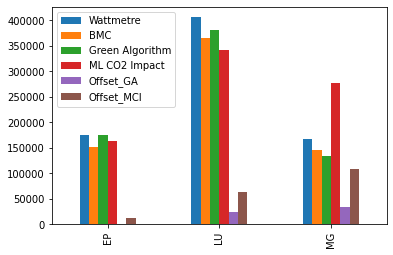

In [ ]:
online_tool_df.plot(kind='bar')

In [ ]:
import matplotlib.pyplot as plt

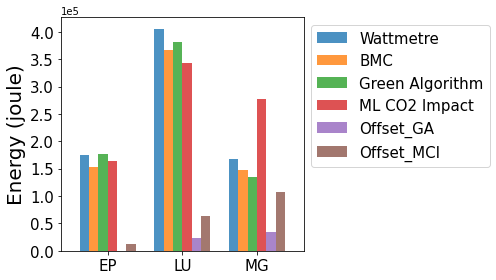

In [ ]:
figsize = (7,4)
fig, axes = plt.subplots(
    1, 
    1, 
    figsize=figsize,
    sharex=False, 
    sharey=False,
)
i=0
axes = online_tool_df.plot(
    ax=axes, 
    #y= ['Wattmetre', 'Green Algorithm', 'ML CO2 Impact'],
    kind='bar',
    rot=0,
    fontsize=15,
    capsize=4,
    linewidth=2,
    width=0.75,
    alpha=0.8,
    )
axes.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axes.set_ylim(bottom=0)
axes.set_ylabel('Energy (joule)', fontsize=20)
axes.set_xlabel('')
axes.legend(bbox_to_anchor=(1, 1), fontsize=15)
#axes.set_title(title, fontsize=20) #  y=-0.12, 


#title = "Comparing tools' energy output with wattmeters"
#fig.suptitle(title, fontsize=20)
fig.tight_layout()

In [ ]:
new_cols = ['Wattmetre', 'BMC', 'Tool', 'Offset \n(Wattmetre - Tool)', 'tool_name', 'gpu_0_appli','gpu_0_appli_class']

In [ ]:
online_tool_df

Wattmetre       BMC  Green Algorithm  ML CO2 Impact  Offset_GA  Offset_MCI
EP   175665.6  152326.8         176174.4       163200.0      508.8     12465.6
LU   405903.6  366130.8         381643.2       342720.0    24260.4     63183.6
MG   168228.0  146700.0         134329.2       276320.0    33898.8    108092.0

In [ ]:
to_concat = {
    'Wattmetre':[175665.6, 405903.6, 168228.0, 175665.6, 405903.6, 168228.0], 
    'BMC':[152326.8, 366130.8, 146700.0, 152326.8, 366130.8, 146700.0], 
    'Tool':[176174.4, 381643.2, 134329.2, 163200.0, 342720.0, 276320.0], 
    'Offset \n|Wattmetre - Tool|':[508.8, 24260.4, 33898.8, 12465.6, 63183.6, 108092.0], 
    'tool_name':['Green Algorithm', 'Green Algorithm', 'Green Algorithm', 'ML CO2 Impact', 'ML CO2 Impact', 'ML CO2 Impact'], 
    'gpu_0_appli':['ep', 'lu', 'mg', 'ep', 'lu', 'mg'],
    'gpu_0_appli_class':['E', 'D', 'D', 'E', 'D', 'D'],
    'tool_on_one_process':[False,False,False,False,False,False]
    }
df_to_concat = pd.DataFrame(to_concat)
df_to_concat

Wattmetre       BMC      Tool  Offset \n|Wattmetre - Tool|  \
0   175665.6  152326.8  176174.4                        508.8   
1   405903.6  366130.8  381643.2                      24260.4   
2   168228.0  146700.0  134329.2                      33898.8   
3   175665.6  152326.8  163200.0                      12465.6   
4   405903.6  366130.8  342720.0                      63183.6   
5   168228.0  146700.0  276320.0                     108092.0   

         tool_name gpu_0_appli gpu_0_appli_class  tool_on_one_process  
0  Green Algorithm          ep                 E                False  
1  Green Algorithm          lu                 D                False  
2  Green Algorithm          mg                 D                False  
3    ML CO2 Impact          ep                 E                False  
4    ML CO2 Impact          lu                 D                False  
5    ML CO2 Impact          mg                 D                False

In [ ]:
new_cols = ['Wattmetre', 'BMC', 'Tool', 'Offset \n|Wattmetre - Tool|']
group_by_cols = ['tool_name']
df_to_concat.groupby(by=group_by_cols).mean()[new_cols]

Wattmetre       BMC           Tool  \
tool_name                                             
Green Algorithm   249932.4  221719.2  230715.600000   
ML CO2 Impact     249932.4  221719.2  260746.666667   

                 Offset \n|Wattmetre - Tool|  
tool_name                                     
Green Algorithm                 19556.000000  
ML CO2 Impact                   61247.066667